In [1]:
%matplotlib inline
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import uuid
import os
import pickle

In [2]:
def makeParamFile(folder, ID, ombh2 = 0.0226, omch2 = 0.112, H0 = 67.74, As = 2.142*10**(-9), n = 0.9667, tao = 0.066):
    #output_root is prefixed to output file names
    paramText = 'output_root = '+folder+'/'+str(ID)+' \n'
    paramText += 'get_scalar_cls = T \n'
    paramText += 'get_vector_cls = F \n'
    paramText += 'get_tensor_cls = F \n'
    paramText += 'get_transfer   = F \n'
    
    paramText += '#if do_lensing then scalar_output_file contains additional columns of l^4 C_l^{pp} and l^3 C_l^{pT} \n'
    paramText += '#where p is the projected potential. Output lensed CMB Culs (without tensors) are in lensed_output_file below. \n'
    paramText += 'do_lensing     = F \n'
    
    paramText += '# 0: linear, 1: non-linear matter power (HALOFIT), 2: non-linear CMB lensing (HALOFIT), \n'
    paramText += '# 3: both non-linear matter power and CMB lensing (HALOFIT) \n'
    paramText += 'do_nonlinear = 0 \n'
    
    paramText += '#Maximum multipole and k*eta. \n'
    paramText += '#  Note that C_ls near l_max are inaccurate (about 5%), go to 50 more than you need \n'
    paramText += '#  Lensed power spectra are computed to l_max_scalar-100 \n'
    paramText += '#  To get accurate lensed BB need to have l_max_scalar>2000, k_eta_max_scalar > 10000 \n'
    paramText += '#  To get accurate lensing potential you also need k_eta_max_scalar > 10000 \n'
    paramText += '#  Otherwise k_eta_max_scalar=2*l_max_scalar usually suffices, or dont set to use default \n'
    paramText += 'l_max_scalar      = 1000 \n'
    paramText += '#k_eta_max_scalar  = 2800 \n'
    
    paramText += '#  Tensor settings should be less than or equal to the above \n'
    paramText += 'l_max_tensor      = 1000 \n'
    paramText += 'k_eta_max_tensor  = 1000 \n'
    
    paramText += '#Main cosmological parameters, neutrino masses are assumed degenerate \n'
    paramText += '# If use_phyical set physical densities in baryons, CDM and neutrinos + Omega_k \n'
    paramText += 'use_physical   = T \n'
    paramText += 'ombh2          = '+str(ombh2)+' \n'
    paramText += 'omch2          = '+str(omch2)+' \n'
    paramText += 'omnuh2         = 0.00064 \n'
    paramText += 'omk            = 0 \n'
    paramText += 'hubble          = '+str(H0)+' \n'
    
    paramText += '#effective equation of state parameter for dark energy \n'
    paramText += 'w              = -1 \n'
    
    paramText += '#constant comoving sound speed of the dark energy (1=quintessence) \n'
    paramText += 'cs2_lam        = 1 \n'
    
    paramText += '#varying w is not supported by default, compile with EQUATIONS=equations_ppf to use crossing PPF w-wa model: \n'
    paramText += '#wa             = 0 \n'
    paramText += '##if use_tabulated_w read (a,w) from the following user-supplied file instead of above \n'
    paramText += '#use_tabulated_w = F \n'
    paramText += '#wafile = wa.dat \n'
    paramText += '#if use_physical = F set parameters as here \n'
    paramText += 'omega_baryon   = 0.0486 \n'
    paramText += 'omega_cdm      = 0.2589 \n'
    paramText += 'omega_lambda   = '+str(1.0-0.0486-0.2589)+' \n'
    paramText += 'omega_neutrino = 0 \n'
    paramText += 'temp_cmb           = 2.7255 \n'
    paramText += 'helium_fraction    = 0.24 \n'
    
    paramText += '#for share_delta_neff = T, the fractional part of massless_neutrinos gives the change in the effective number  \n'
    paramText += '#(for QED + non-instantaneous decoupling)  i.e. the increase in neutrino temperature, \n'
    paramText += '#so Neff = massless_neutrinos + sum(massive_neutrinos) \n'
    paramText += '#For full neutrino parameter details see http://cosmologist.info/notes/CAMB.pdf \n'
    paramText += 'massless_neutrinos = 2.046 \n'
    
    paramText += '#number of distinct mass eigenstates \n'
    paramText += 'nu_mass_eigenstates = 1 \n'
    
    paramText += '#array of the integer number of physical neutrinos per eigenstate, e.g. massive_neutrinos = 2 1 \n'
    paramText += 'massive_neutrinos  = 1 \n'
    
    paramText += '#specify whether all neutrinos should have the same temperature, specified from fractional part of massless_neutrinos \n'
    paramText += 'share_delta_neff = T \n'
    
    paramText += '#nu_mass_fractions specifies how Omeganu_h2 is shared between the eigenstates \n'
    paramText += '#i.e. to indirectly specify the mass of each state; e.g. nu_mass_factions= 0.75 0.25 \n'
    paramText += 'nu_mass_fractions = 1 \n'
    
    paramText += '#if share_delta_neff = F, specify explicitly the degeneracy for each state (e.g. for sterile with different temperature to active) \n'
    paramText += '#(massless_neutrinos must be set to degeneracy for massless, i.e. massless_neutrinos does then not include Deleta_Neff from massive) \n'
    paramText += '#if share_delta_neff=T then degeneracies is not given and set internally \n'
    paramText += '#e.g. for massive_neutrinos = 2 1, this gives equal temperature to 4 neutrinos: nu_mass_degeneracies = 2.030 1.015, massless_neutrinos = 1.015 \n'
    paramText += 'nu_mass_degeneracies = \n'
    paramText += '#Initial power spectrum,amplitude, spectral index and running. Pivot k in Mpc^{-1}. \n'
    paramText += 'initial_power_num         = 1 \n'
    paramText += 'pivot_scalar              = 0.05 \n'
    paramText += 'pivot_tensor              = 0.05 \n'
    paramText += 'scalar_amp(1)             = '+str(As)+' \n'
    paramText += 'scalar_spectral_index(1)  = '+str(n)+' \n'
    paramText += 'scalar_nrun(1)            = 0 \n'
    paramText += 'scalar_nrunrun(1)         = 0 \n'
    paramText += 'tensor_spectral_index(1)  = 0 \n'
    paramText += 'tensor_nrun(1)            = 0 \n'
    paramText += '#Three parameterizations (1,2,3) for tensors, see http://cosmologist.info/notes/CAMB.pdf \n'
    paramText += 'tensor_parameterization   = 1 \n'
    paramText += '#ratio is that of the initial tens/scal power spectrum amplitudes, depending on parameterization \n'
    paramText += '#for tensor_parameterization == 1, P_T = initial_ratio*scalar_amp*(k/pivot_tensor)^tensor_spectral_index \n'
    paramText += '#for tensor_parameterization == 2, P_T = initial_ratio*P_s(pivot_tensor)*(k/pivot_tensor)^tensor_spectral_index \n'
    paramText += '#Note that for general pivot scales and indices, tensor_parameterization==2 as P_T depending on n_s \n'
    paramText += 'initial_ratio(1)          = 1 \n'
    paramText += '#tensor_amp is used instead if tensor_parameterization == 3, P_T = tensor_amp *(k/pivot_tensor)^tensor_spectral_index \n'
    paramText += '#tensor_amp(1)            = 4e-10 \n'
    paramText += '#note vector modes use the scalar settings above \n'
    paramText += '#Reionization, ignored unless reionization = T, re_redshift measures where x_e=0.5 \n'
    paramText += 'reionization         = T \n'
    paramText += 're_use_optical_depth = T \n'
    paramText += 're_optical_depth     = '+str(tao)+' \n'
    paramText += '#If re_use_optical_depth = F then use following, otherwise ignored \n'
    paramText += 're_redshift          = 11 \n'
    paramText += '#width of reionization transition. CMBFAST model was similar to re_delta_redshift~0.5. \n'
    paramText += 're_delta_redshift    = 1.5 \n'
    paramText += '#re_ionization_frac=-1 sets to become fully ionized using YE to get helium contribution \n'
    paramText += '#Otherwise x_e varies from 0 to re_ionization_frac \n'
    paramText += 're_ionization_frac   = -1 \n'
    paramText += '#RECFAST 1.5.x recombination parameters; \n'
    paramText += 'RECFAST_fudge = 1.14 \n'
    paramText += 'RECFAST_fudge_He = 0.86 \n'
    paramText += 'RECFAST_Heswitch = 6 \n'
    paramText += 'RECFAST_Hswitch  = T \n'
    paramText += 'CosmoMC parameters - compile with RECOMBINATION=cosmorec and link to CosmoMC to use these \n'
    paramText += '# \n'
    paramText += '# cosmorec_runmode== 0: CosmoMC run with diffusion \n'
    paramText += '#                    1: CosmoMC run without diffusion \n'
    paramText += '#                    2: RECFAST++ run (equivalent of the original RECFAST version) \n'
    paramText += '#                    3: RECFAST++ run with correction function of Calumba & Thomas, 2010 \n'
    paramText += '# \n'
    paramText += '# For "cosmorec_accurac" and "cosmorec_fdm" see CosmoMC for explanation \n'
    paramText += '#--------------------------------------------------------------------------------------- \n'
    paramText += '#cosmorec_runmode        = 0 \n'
    paramText += '#cosmorec_accuracy       = 0 \n'
    paramText += '#cosmorec_fdm            = 0 \n'
    paramText += '#Initial scalar perturbation mode (adiabatic=1, CDM iso=2, Baryon iso=3,  \n'
    paramText += '# neutrino density iso =4, neutrino velocity iso = 5)  \n'
    paramText += 'initial_condition   = 1 \n'
    paramText += '#If above is zero, use modes in the following (totally correlated) proportions \n'
    paramText += '#Note: we assume all modes have the same initial power spectrum \n'
    paramText += 'initial_vector = -1 0 0 0 0 \n'
    paramText += '#For vector modes: 0 for regular (neutrino vorticity mode), 1 for magnetic \n'
    paramText += 'vector_mode = 0 \n'
    paramText += '#Normalization \n'
    paramText += 'COBE_normalize =F \n'
    
    paramText += '##CMB_outputscale scales the output Culs \n'
    paramText += '#To get MuK^2 set realistic initial amplitude (e.g. scalar_amp(1) = 2.3e-9 above) and \n'
    paramText += '#otherwise for dimensionless transfer functions set scalar_amp(1)=1 and use \n'
    paramText += '#CMB_outputscale = 1 \n'
    paramText += 'CMB_outputscale = 7.42835025e12  \n'
    
    paramText += '#Transfer function settings, transfer_kmax=0.5 is enough for sigma_8 \n'
    paramText += '#transfer_k_per_logint=0 sets sensible non-even sampling; \n'
    paramText += '#transfer_k_per_logint=5 samples fixed spacing in log-k \n'
    paramText += '#transfer_interp_matterpower =T produces matter power in regular interpolated grid in log k;  \n'
    paramText += '# use transfer_interp_matterpower =F to output calculated values (e.g. for later interpolation) \n'
    paramText += 'transfer_high_precision = F \n'
    paramText += 'transfer_kmax           = 2 \n'
    paramText += 'transfer_k_per_logint   = 0 \n'
    paramText += 'transfer_num_redshifts  = 1 \n'
    paramText += 'transfer_interp_matterpower = T \n'
    paramText += 'transfer_redshift(1)    = 0 \n'
    paramText += 'transfer_filename(1)    = transfer_out.dat \n'
    
    paramText += '#Matter power spectrum output against k/h in units of h^{-3} Mpc^3 \n'
    paramText += 'transfer_matterpower(1) = matterpower.dat \n'
    
    paramText += '#Output files not produced if blank. make camb_fits to use the FITS setting. \n'
    paramText += 'scalar_output_file = scalCls.dat \n'
    paramText += 'vector_output_file = vecCls.dat \n'
    paramText += 'tensor_output_file = tensCls.dat \n'
    paramText += 'total_output_file  = totCls.dat \n'
    paramText += 'lensed_output_file = lensedCls.dat \n'
    paramText += 'lensed_total_output_file  =lensedtotCls.dat \n'
    paramText += 'lens_potential_output_file = lenspotentialCls.dat \n'
    paramText += 'FITS_filename      = scalCls.fits \n'
    
    paramText += '#Bispectrum parameters if required; primordial is currently only local model (fnl=1) \n'
    paramText += '#lensing is fairly quick, primordial takes several minutes on quad core \n'
    paramText += 'do_lensing_bispectrum = F \n'
    paramText += 'do_primordial_bispectrum = F \n'
    
    paramText += '#1 for just temperature, 2 with E \n'
    paramText += 'bispectrum_nfields = 1 \n'
    
    paramText += '#set slice non-zero to output slice b_{bispectrum_slice_base_L L L+delta} \n'
    paramText += 'bispectrum_slice_base_L = 0 \n'
    paramText += 'bispectrum_ndelta=3 \n'
    paramText += 'bispectrum_delta(1)=0 \n'
    paramText += 'bispectrum_delta(2)=2 \n'
    paramText += 'bispectrum_delta(3)=4 \n'
    
    paramText += '#bispectrum_do_fisher estimates errors and correlations between bispectra \n'
    paramText += '#note you need to compile with LAPACK and FISHER defined to use get the Fisher info \n'
    paramText += 'bispectrum_do_fisher= F \n'
    
    paramText += '#Noise is in muK^2, e.g. 2e-4 roughly for Planck temperature \n'
    paramText += 'bispectrum_fisher_noise=0 \n'
    paramText += 'bispectrum_fisher_noise_pol=0 \n'
    paramText += 'bispectrum_fisher_fwhm_arcmin=7 \n'
    
    paramText += '#Filename if you want to write full reduced bispectrum (at sampled values of l_1) \n'
    paramText += 'bispectrum_full_output_file= \n'
    paramText += 'bispectrum_full_output_sparse=F \n'
    
    paramText += '#Export alpha_l(r), beta_l(r) for local non-Gaussianity \n'
    paramText += 'bispectrum_export_alpha_beta=F \n'
    
    paramText += '##Optional parameters to control the computation speed,accuracy and feedback \n'
    paramText += '#If feedback_level > 0 print out useful information computed about the model \n'
    paramText += 'feedback_level = 1 \n'
    
    paramText += '#write out various derived parameters \n'
    paramText += 'derived_parameters = T \n'
    
    paramText += '# 1: curved correlation function, 2: flat correlation function, 3: inaccurate harmonic method \n'
    paramText += 'lensing_method = 1 \n'
    paramText += 'accurate_BB = F \n'
    
    paramText += '#massive_nu_approx: 0 - integrate distribution function \n'
    paramText += '#                   1 - switch to series in velocity weight once non-relativistic \n'
    paramText += 'massive_nu_approx = 1 \n'
    
    paramText += '#Whether you are bothered about polarization.  \n'
    paramText += 'accurate_polarization   = T \n'
    
    paramText += '#Whether you are bothered about percent accuracy on EE from reionization \n'
    paramText += 'accurate_reionization   = T \n'
    
    paramText += '#whether or not to include neutrinos in the tensor evolution equations \n'
    paramText += 'do_tensor_neutrinos     = T \n'
    
    paramText += '#Whether to turn off small-scale late time radiation hierarchies (save time,v. accurate) \n'
    paramText += 'do_late_rad_truncation   = T \n'
    
    paramText += '#Computation parameters \n'
    paramText += '#if number_of_threads=0 assigned automatically \n'
    paramText += 'number_of_threads       = 0 \n'
    
    paramText += '#Default scalar accuracy is about 0.3% (except lensed BB) if high_accuracy_default=F \n'
    paramText += '#If high_accuracy_default=T the default target accuracy is 0.1% at L>600 (with boost parameter=1 below) \n'
    paramText += '#Try accuracy_boost=2, l_accuracy_boost=2 if you want to check stability/even higher accuracy \n'
    paramText += '#Note increasing accuracy_boost parameters is very inefficient if you want higher accuracy, \n'
    paramText += '#but high_accuracy_default is efficient \n'
    paramText += 'high_accuracy_default=T \n'
    paramText += '#Increase accuracy_boost to decrease time steps, use more k values,  etc. \n'
    paramText += '#Decrease to speed up at cost of worse accuracy. Suggest 0.8 to 3. \n'
    paramText += 'accuracy_boost          = 1 \n'
    paramText += '#Larger to keep more terms in the hierarchy evolution. \n'
    paramText += 'l_accuracy_boost        = 1 \n'
    paramText += '#Increase to use more C_l values for interpolation. \n'
    paramText += '#Increasing a bit will improve the polarization accuracy at l up to 200 - \n'
    paramText += '#interpolation errors may be up to 3% \n'
    paramText += '#Decrease to sFpeed up non-flat models a bit \n'
    paramText += 'l_sample_boost          = 1 \n'

    with open(str(ID) + '.ini','w') as fil:
        fil.write(paramText)
        
def generateData(folder,ID, ombh2 = 0.0226, omch2 = 0.112, H0 = 67.74, As = 2.142*10**(-9), n = 0.9667, tao = 0.066):
    makeParamFile(folder,ID,ombh2 = ombh2, omch2 = omch2, H0 = H0, As = As, n = n, tao = tao)
    os.system('./CAMB ' + str(ID) + '.ini')
    os.remove(str(ID) + '.ini')

    
def loadData(folder,fil):
    data = []
    with open(folder + '/' + fil,'r') as fil:
        for row in fil:
            data.append([float(x) for x in row.split( )])
    return np.array(data)

def loadCl(folder,index):
    return loadData(folder,str(index) + '_scalCls.dat')

def logDist(cl1,cl2):
    imax = min(len(cl1),len(cl2))
    logDist = 0.0
    for i in range(imax):
        l1, cl1TT, cl1EE, cl1TE = cl1[i]
        l2, cl2TT, cl2EE, cl2TE = cl2[i]
        l = l1
        
        a = (((cl1TE+cl2TE)**2 - (cl1EE + cl2EE)*(cl1TT+cl2TT)))**2
        c = (cl1TE**2-cl1TT*cl1EE) * (cl2TE**2-cl2TT*cl2EE)
        d = np.log(16)
        element = (-(2*l+1)/4.0)*(np.log(abs(a)) - np.log(abs(c)) - d)
        logDist += element
    return -logDist

def loadParams(paramFil,params = ['hubble','ombh2','omch2','re_optical_depth','scalar_spectral_index(1)','scalar_amp(1)']):
    paramList = []
    with open(paramFil,'r') as fil:
        for row in fil:
            paramList.append(row)
    paramList_short = {}
    for param in params:
        for element in paramList:
            if param in element:
                tempVal = float(element.replace('=','').replace('\n','').replace(param,''))
                paramList_short.update({param:tempVal})
                break
    return paramList_short

def sigmoid(x,l=1,x0=0):
    return l * np.exp(x)/(np.exp(x)+1) + x0
def logit(x,l=1,x0=0):
    return np.log((x - x0)/l)-np.log(1-(x-x0)/l)

def paramStep(params,stepsize = 0.3):
    ini = [np.log(params['hubble']),np.log(params['ombh2']),np.log(params['omch2']),logit(params['re_optical_depth']),logit(np.log(params['scalar_amp(1)']),l=7,x0=-24),logit(params['scalar_spectral_index(1)'])]
    
    step = random.uniform(low=-1.0,high=1.0,size=(6))
    step = stepsize * step/np.linalg.norm(step)
    
    step = ini + step
    
    return {'hubble':np.exp(step[0]),'ombh2':np.exp(step[1]),'omch2':np.exp(step[2]),'re_optical_depth':sigmoid(step[3]),'scalar_amp(1)':np.exp(sigmoid(step[4],l=7,x0=-24)),'scalar_spectral_index(1)':sigmoid(step[5])}

def openRawText(filePath):
    with open(filePath,'r') as fil:
        file = []
        for dat in fil:
            line = dat.split()
            try:
                file.append([float(element) for element in line])
            except ValueError:
                pass
    return np.array(file)

def logDist(cl1,cl2):
    imax = min(len(cl1),len(cl2))
    logDist = 0.0
    for i in range(imax):
        l1, cl1TT, cl1EE, cl1TE = cl1[i]
        l2, cl2TT, cl2EE, cl2TE = cl2[i]
        l = l1
        
        a = (((cl1TE+cl2TE)**2 - (cl1EE + cl2EE)*(cl1TT+cl2TT)))**2
        c = (cl1TE**2-cl1TT*cl1EE) * (cl2TE**2-cl2TT*cl2EE)
        d = np.log(16)
        element = (-(2*l+1)/4.0)*(np.log(abs(a)) - np.log(abs(c)) - d)
        logDist += element
    return -logDist

def saveThing(thing,file):
    with open(file,'wb') as fil:
        pick = pickle.Pickler(fil)
        pick.dump(thing)
        pick.clear_memo()

In [3]:
generateData('varParams',ID='universe')
paramsUni = loadParams('varParams/universe_params.ini')

In [4]:
clUni = loadCl('varParams','universe')

In [134]:
Aslist = [1*10**(-9),1.5*10**(-9),2.142*10**(-9),2.5*10**(-9),3*10**(-9)]
Asnames = [r'$1.0\times 10^{-9}$',r'$1.5\times 10^{-9}$','Our Universe',r'$2.5\times 10^{-9}$',r'$3.0\times 10^{-9}$']
AsClList = []
for As in Aslist:
    generateData('varParams',ID='As'+str(As),As = As)
    AsClList.append(loadCl('varParams','As'+str(As)))

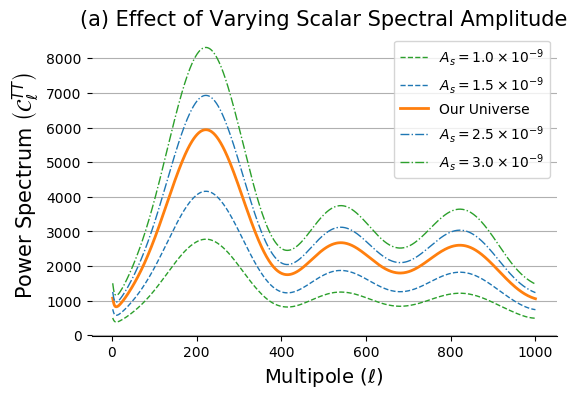

In [159]:
fig, ax = plt.subplots(dpi=100)

idx = 0
for cl in AsClList:
    As = Aslist[idx]
    if As == 2.142*10**(-9):
        linewidth = 2
        c = 'C1'
        label = 'Our Universe'
        linestyle = 'solid'
    else:
        linewidth = 1
        c = 'C0'
        if As > 2.142*10**(-9):
            linestyle = '-.'
        else:
            linestyle = '--'
        label = r'$A_s = $'+Asnames[idx]
    if (idx == 0) or (idx == 4):
        c = 'C2'
    plt.plot(cl[:,0],cl[:,1], alpha = 1, c=c, linewidth=linewidth, label=label, linestyle = linestyle)
    idx += 1
    
#plt.xscale('log')
#plt.yscale('log')

plt.legend()

ax.patch.set_alpha(0)

for loc in ['top','left','right']:
    ax.spines[loc].set_visible(False)
    
plt.grid(axis='y',which='both')

plt.xlabel('Multipole '+r'$(\ell)$',fontsize=14)
plt.ylabel('Power Spectrum '+r'$\left(\mathcal{C}_\ell^{TT}\right)$',fontsize=15)

plt.title('(a) Effect of Varying Scalar Spectral Amplitude', fontsize=15)

plt.show()

In [144]:
H0list = [40,60,67.74,80,100]
H0ClList = []
for H0 in H0list:
    generateData('varParams',ID='hubble'+str(H0),H0 = H0)
    H0ClList.append(loadCl('varParams','hubble'+str(H0)))

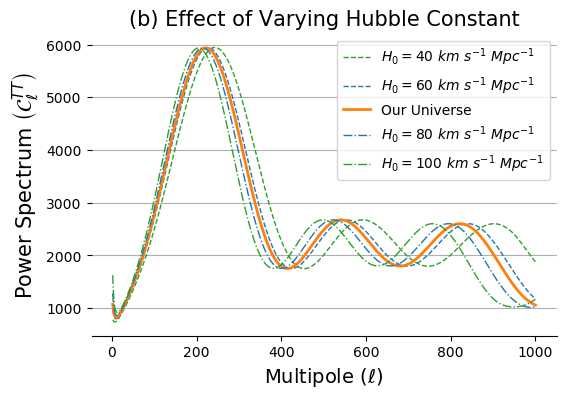

In [158]:
fig, ax = plt.subplots(dpi=100)

idx = 0
for cl in H0ClList:
    H0 = H0list[idx]
    if H0 == 67.74:
        alpha = 1
        linewidth = 2
        c = 'C1'
        label = 'Our Universe'
        linestyle = 'solid'
    else:
        alpha = H0/100
        linewidth = 1
        c = 'C0'
        if H0 > 67.74:
            linestyle = '-.'
        else:
            linestyle = '--'
        label = r'$H_0 = $'+str(H0) + r'$\ km\ s^{−1}\ Mpc^{−1}$'
    if (idx == 0) or (idx == 4):
        c = 'C2'
    plt.plot(cl[:,0],cl[:,1], alpha = 1, c=c, linewidth=linewidth, label=label, linestyle = linestyle)
    idx += 1
    
#plt.xscale('log')
#plt.yscale('log')

plt.legend()

ax.patch.set_alpha(0)

for loc in ['top','left','right']:
    ax.spines[loc].set_visible(False)
    
plt.grid(axis='y',which='both')

plt.xlabel('Multipole '+r'$(\ell)$',fontsize=14)
plt.ylabel('Power Spectrum '+r'$\left(\mathcal{C}_\ell^{TT}\right)$',fontsize=15)

plt.title('(b) Effect of Varying Hubble Constant', fontsize=15)

plt.show()

In [146]:
etalist = [0.8,0.9,0.9667,0.98,0.99]
etaClList = []
for eta in etalist:
    generateData('varParams',ID='eta'+str(eta),n = eta)
    etaClList.append(loadCl('varParams','eta'+str(eta)))

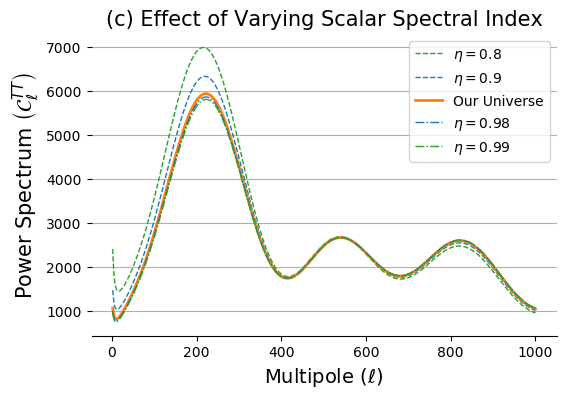

In [157]:
fig, ax = plt.subplots(dpi=100)

idx = 0
for cl in etaClList:
    eta = etalist[idx]
    if eta == 0.9667:
        alpha = 1
        linewidth = 2
        c = 'C1'
        label = 'Our Universe'
        linestyle = 'solid'
    else:
        alpha = eta/max(etalist)
        linewidth = 1
        c = 'C0'
        label = r'$\eta = $'+str(eta)
        if eta > 0.9667:
            linestyle = '-.'
        else:
            linestyle = '--'
    if (idx == 0) or (idx == 4):
        c = 'C2'
    plt.plot(cl[:,0],cl[:,1], alpha = 1, c=c, linewidth=linewidth, label=label, linestyle = linestyle)
    idx += 1
    
#plt.xscale('log')
#plt.yscale('log')

plt.legend()

ax.patch.set_alpha(0)

for loc in ['top','left','right']:
    ax.spines[loc].set_visible(False)
    
plt.grid(axis='y',which='both')

plt.xlabel('Multipole '+r'$(\ell)$',fontsize=14)
plt.ylabel('Power Spectrum '+r'$\left(\mathcal{C}_\ell^{TT}\right)$',fontsize=15)

plt.title('(c) Effect of Varying Scalar Spectral Index', fontsize=15)

plt.show()